In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2010-01-01'
end = '2021-12-31'

df = data.get_data_yahoo('AAPL',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537301
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537301
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [6]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


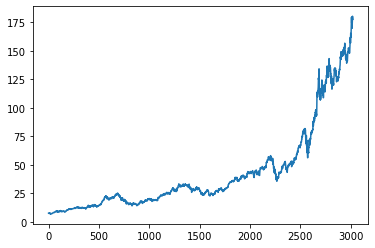

In [7]:
plt.plot(df.Close)

In [8]:

ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

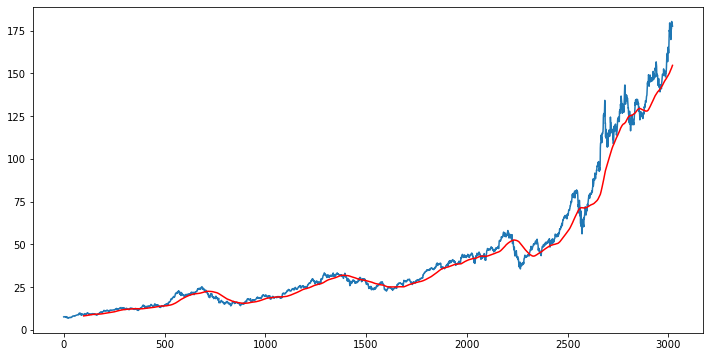

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

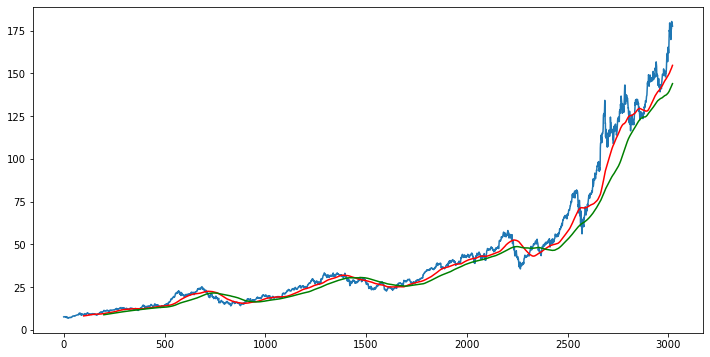

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3022, 5)

In [13]:
# splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [18]:
x_train =[]
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML MODEL

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2)) 
          
          
model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))       
model.add(Dropout(0.3)) 
          
model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4)) 
          
          
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))           
          
          
model.add(Dense(units = 1))          

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 60s 580ms/step - loss: 0.0372
Epoch 2/50
63/63 [==============================] - 36s 569ms/step - loss: 0.0084
Epoch 3/50
63/63 [==============================] - 36s 565ms/step - loss: 0.0070
Epoch 4/50
63/63 [==============================] - 38s 600ms/step - loss: 0.0053
Epoch 5/50
63/63 [==============================] - 36s 571ms/step - loss: 0.0065
Epoch 6/50
63/63 [==============================] - 36s 564ms/step - loss: 0.0057
Epoch 7/50
63/63 [==============================] - 34s 532ms/step - loss: 0.0053
Epoch 8/50
63/63 [==============================] - 35s 551ms/step - loss: 0.0053
Epoch 9/50
63/63 [==============================] - 35s 559ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 36s 566ms/step - loss: 0.0045
Epoch 11/50
63/63 [==============================] - 41s 645ms/step - loss: 0.0050
Epoch 12/50
63/63 [==============================] - 35s 562ms/step - loss: 0.0044
Epoch 13/50
6

In [46]:
model.save('keras_model.h5')

In [47]:
past_100_days = data_training.tail(100)

In [50]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_1712\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [51]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [53]:
input_data.shape

(1007, 1)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
    

In [1]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

NameError: name 'np' is not defined

In [57]:
#Making Predictions

y_predicted = model.predict(x_test)

29/29 [==============================] - 6s 134ms/step


In [58]:
y_predicted.shape

(907, 1)

In [59]:
y_predicted

array([[0.15850733],
       [0.15945163],
       [0.16028723],
       [0.16101225],
       [0.16164097],
       [0.16219646],
       [0.1627067 ],
       [0.16319808],
       [0.16368818],
       [0.16417971],
       [0.16466714],
       [0.16514587],
       [0.16560405],
       [0.16603029],
       [0.16640745],
       [0.16672103],
       [0.16694957],
       [0.16708082],
       [0.16710639],
       [0.16702333],
       [0.166825  ],
       [0.16652021],
       [0.16612376],
       [0.16565998],
       [0.16515335],
       [0.1646356 ],
       [0.16412166],
       [0.16362739],
       [0.16317552],
       [0.16279519],
       [0.16250779],
       [0.16231537],
       [0.16222428],
       [0.16223629],
       [0.16234547],
       [0.16254309],
       [0.16281267],
       [0.16314158],
       [0.16351512],
       [0.16391924],
       [0.1643462 ],
       [0.16479656],
       [0.16526821],
       [0.16574407],
       [0.16620149],
       [0.16662133],
       [0.16703461],
       [0.167

In [60]:
scaler.scale_

array([0.00690691])

In [61]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

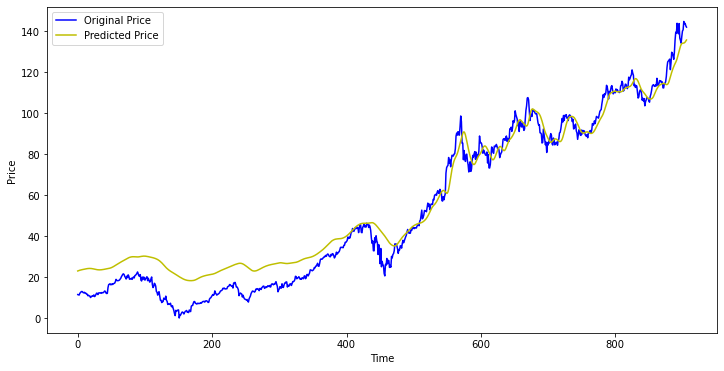

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'y', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()